# Bayseian Binary 
This is a test noteook for running emcee with the Baysian method

First part is cleaning up the data. Getting rid of low SNR points, adding isochron fitting and stuff like that

In [1]:
%run BinaryDataClean3.py

# Inputs are paths to the fits files I'm using. First one is the allaverage file, second is the allvisit type
# file. 3rd is the isochrone files. 
Tables = BinaryDataClean3('/home/cody/Binary Search/2nd_Data_Set/mc_rgb_nocuts.fits','/home/cody/Binary Search/2nd_Data_Set/allVisit-t9-l31c-58247.mc.fits',
                          '/home/cody/Binary Search/parsec_decamsdss_all.fits.gz')
AllAvg, AllVis, ISO = Tables.get_data() # Set up the tables
AllVis = Tables.cuts(AllVis)  # Cut low SNR values and velocities that are too alrge
AllAvg = Tables.nvisits_cut(AllAvg,5) # Only want stars with at least 5 visits
AAS_RG = Tables.rg_cut(AllAvg) # Double check that I'm working with Red giant stars

AAS_RG_I = Tables.iso_fit(AAS_RG,ISO) # Perform the isochrone fitting. This is where the print statements are coming from

AAS_RV_I = Tables.rv_table_add(AAS_RG_I, AllVis) # Tack on the radial velocity values, error, and observation date
                                                # This is so everything i need is in one table. Three columns
                                                # are string for saving purposes

AllAvg_LMC_I = Tables.mc_cut(AAS_RV_I, 'L') # Cut it up into one table for the LMC and one for the SMC
AllAvg_SMC_I = Tables.mc_cut(AAS_RV_I, 'S')

AllAvg_SMC=Tables.Table_Convert(AllAvg_SMC_I) # Turn the strings made in rv_table_add into lists
AllAvg_LMC=Tables.Table_Convert(AllAvg_LMC_I)


Done with 0.000000
No good fits in 3 sigma of erros. Star 2M05140287-7214484, row 16
No good fits in 3 sigma of erros. Star 2M05205391-7259483, row 87
No good fits in 3 sigma of erros. Star 2M05214222-7227340, row 98
Done with 100.000000
No good fits in 3 sigma of erros. Star 2M05215411-7316058, row 103
No good fits in 3 sigma of erros. Star 2M05235220-7216056, row 124
Done with 200.000000
No good fits in 3 sigma of erros. Star 2M04570693-7129288, row 250
No good fits in 3 sigma of erros. Star 2M05010386-7102238, row 300
No good fits in 3 sigma of erros. Star 2M06261934-7011104, row 370
No good fits in 3 sigma of erros. Star 2M06281846-7008537, row 400
No good fits in 3 sigma of erros. Star 2M06320563-7050235, row 451
No good fits in 3 sigma of erros. Star 2M06354972-6957575, row 488
No good fits in 3 sigma of erros. Star 2M06390106-7040477, row 500
No good fits in 3 sigma of erros. Star 2M05185026-7556305, row 510
No good fits in 3 sigma of erros. Star 2M05221955-7617219, row 529
No g

Next cell is a little hacky, it's doing through everything again and making sure I only have stars with at least 5 observations. When I cut out low SNR observations, the nvisits_cut, doens't hit all of the stars it should hit.

In [2]:
rr = []
for N in range(len(AllAvg_LMC)):
    if len(AllAvg_LMC['RADIALV'][N]) <= 5:
        rr.append(N)
AllAvg_LMC.remove_rows(rr)

rr = []
for N in range(len(AllAvg_SMC)):
    if len(AllAvg_SMC['RADIALV'][N]) <= 5:
        rr.append(N)
AllAvg_SMC.remove_rows(rr)

This uses the log likelihood, should be bug free? Set up to work well with $\textit{emcee}$. 

In [74]:
%run BinaryBays2.py

In [75]:
BB2 = BinaryBays2(AllAvg_LMC)

In [76]:
a = 0.1
b = 0.61
bob2 = BB2.lnlike(100, ['L',3.2,2.5], bf = 0.1 , loops = 2,
                         jitter = True, a = a, b = b, bins = np.arange(0,11,1))

Starting loop 0
Starting loop 1
Done with fraction  0.1 2018-12-26 14:36:36.916864


This is all taken from the $\textit{emcee}$, page, but modified for what I need. Right now there are just 3 paramiters. In theory I could have more, but to make sure things are working I thought I would keep it simple for now.

In [77]:
ndim, nwalkers = 3, 50
pos = [np.array([0.3, -0.1, 0.4]) + np.random.uniform(0,0.5,ndim) for i in range(nwalkers)]
pos = np.array(pos)
pos

array([[ 5.76556849e-01,  1.72865546e-01,  8.30990823e-01],
       [ 6.13826531e-01,  5.29811514e-02,  5.13450440e-01],
       [ 7.60081141e-01,  2.97500479e-01,  5.02427100e-01],
       [ 7.28074557e-01,  3.65930675e-01,  4.25904130e-01],
       [ 4.69933865e-01,  4.36032402e-04,  7.78788167e-01],
       [ 5.00262857e-01,  2.40377884e-01,  7.79772210e-01],
       [ 6.33122339e-01,  2.22101662e-01,  8.64006176e-01],
       [ 4.36440907e-01,  1.98527749e-01,  8.72542475e-01],
       [ 7.15574503e-01,  2.82476236e-01,  5.82210626e-01],
       [ 3.64303555e-01,  2.06085358e-01,  7.78663709e-01],
       [ 5.54802275e-01, -8.73407311e-02,  6.59191877e-01],
       [ 6.54469531e-01,  2.12774686e-01,  5.54570457e-01],
       [ 4.15324873e-01,  6.98058142e-02,  5.11881661e-01],
       [ 5.13166523e-01,  1.77278911e-02,  4.20563057e-01],
       [ 7.92384574e-01,  2.74089041e-01,  4.67221540e-01],
       [ 7.40085293e-01,  3.52981535e-01,  8.19778519e-01],
       [ 4.31786731e-01,  1.38956260e-01

(array([6., 5., 4., 4., 4., 2., 7., 6., 7., 5.]),
 array([0.30752187, 0.35600814, 0.40449441, 0.45298068, 0.50146695,
        0.54995322, 0.59843949, 0.64692576, 0.69541203, 0.7438983 ,
        0.79238457]),
 <a list of 10 Patch objects>)

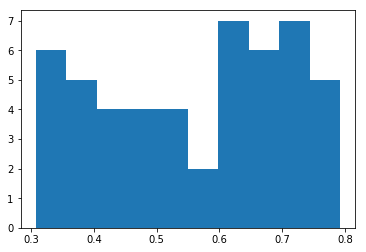

In [78]:
import matplotlib.pyplot as plt
plt.hist(pos[:,0])

In [79]:
import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, BB2.lnprob, args = (100, ['L',3.2,2.5],
                                                                    10, True, np.arange(0,11,1)),
                               threads = 4)

Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 2
Starting loop 2
Starting loop 2
Starting loop 3
Starting loop 3
Starting loop 2
Starting loop 4
Starting loop 4
Starting loop 3
Starting loop 3
Starting loop 5
Starting loop 5
Starting loop 4
Starting loop 6
Starting loop 6
Starting loop 4
Starting loop 7
Starting loop 5
Starting loop 7
Starting loop 8
Starting loop 5
Starting loop 6
Starting loop 8
Starting loop 9
Starting loop 9
Starting loop 7
Starting loop 6
Done with fraction  0.41532487266897844 2018-12-26 14:37:49.170805
Starting loop 0
Done with fraction  0.46993386471697723 2018-12-26 14:37:54.732964
Starting loop 0
Starting loop 8
Starting loop 1
Starting loop 7
Starting loop 1
Starting loop 2
Starting loop 9
Starting loop 8
Starting loop 2
Starting loop 3
Done with fraction  0.5765568487533397 2018-12-26 14:38:12.439078
Starting loop 0
Starting loop 3
Starting loop 4
Starting loop 9


Starting loop 0
Done with fraction  0.34281826219268235 2018-12-26 14:52:50.343703
Starting loop 0
Starting loop 2
Starting loop 7
Starting loop 1
Starting loop 1
Starting loop 2
Starting loop 8
Starting loop 2
Starting loop 3
Starting loop 3
Starting loop 3
Starting loop 9
Starting loop 4
Starting loop 4
Starting loop 4
Starting loop 5
Starting loop 5
Done with fraction  0.5037145241449252 2018-12-26 14:53:23.656404
Starting loop 0
Starting loop 6
Starting loop 6
Starting loop 5
Starting loop 7
Starting loop 7
Starting loop 1
Starting loop 6
Starting loop 8
Starting loop 8
Starting loop 9
Starting loop 2
Starting loop 9
Starting loop 7
Done with fraction  0.3190028659133129 2018-12-26 14:53:53.458382
Starting loop 0
Done with fraction  0.35166611623422944 2018-12-26 14:53:56.341350
Starting loop 0
Starting loop 3
Starting loop 1
Starting loop 8
Starting loop 1
Starting loop 4
Starting loop 2
Starting loop 9
Starting loop 5
Starting loop 2
Starting loop 3
Done with fraction  0.62721256

Starting loop 4
Starting loop 6
Starting loop 5
Starting loop 7
Starting loop 8
Starting loop 6
Starting loop 9
Starting loop 7
Done with fraction  0.7688239985785709 2018-12-26 15:09:11.845661
Starting loop 8
Starting loop 9
Done with fraction  0.8686533395213332 2018-12-26 15:09:27.100934
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 1
Starting loop 2
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 3
Starting loop 4
Starting loop 2
Starting loop 2
Starting loop 5
Starting loop 2
Starting loop 6
Starting loop 7
Starting loop 3
Starting loop 3
Starting loop 3
Starting loop 8
Starting loop 9
Starting loop 4
Done with fraction  0.27857933131995183 2018-12-26 15:10:13.273242
Starting loop 4
Starting loop 0
Starting loop 4
Starting loop 1
Starting loop 2
Starting loop 5
Starting loop 5
Starting loop 3
Starting loop 5
Starting loop 4
Starting loop 6
Starting loop 5
Starting loop 6
Starting loop 6
Starting loop 6
Starting loop 7
Starting loop 7
S

Starting loop 0
Starting loop 3
Starting loop 5
Starting loop 6
Starting loop 1
Starting loop 6
Starting loop 4
Starting loop 2
Starting loop 7
Starting loop 7
Starting loop 8
Starting loop 3
Starting loop 8
Starting loop 5
Starting loop 9
Starting loop 4
Starting loop 9
Done with fraction  0.40305188736493774 2018-12-26 15:23:22.774980
Starting loop 0
Starting loop 6
Starting loop 5
Done with fraction  0.5819229018343358 2018-12-26 15:23:29.610638
Starting loop 0
Starting loop 1
Starting loop 6
Starting loop 7
Starting loop 1
Starting loop 2
Starting loop 7
Starting loop 2
Starting loop 8
Starting loop 8
Starting loop 3
Starting loop 3
Starting loop 9
Starting loop 9
Starting loop 4
Starting loop 4
Done with fraction  0.5530916006840737 2018-12-26 15:24:12.500364
Starting loop 0
Done with fraction  0.8269227638199032 2018-12-26 15:24:16.581381
Starting loop 0
Starting loop 5
Starting loop 1
Starting loop 5
Starting loop 2
Starting loop 1
Starting loop 6
Starting loop 6
Starting loop 3

Starting loop 8
Starting loop 9
Done with fraction  0.6253395151165919 2018-12-26 15:37:22.632928
Done with fraction  0.4826817318794875 2018-12-26 15:37:26.319972
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 1
Starting loop 2
Starting loop 1
Starting loop 1
Starting loop 3
Starting loop 1
Starting loop 4
Starting loop 2
Starting loop 5
Starting loop 2
Starting loop 6
Starting loop 3
Starting loop 7
Starting loop 8
Starting loop 2
Starting loop 3
Starting loop 4
Starting loop 9
Done with fraction  0.20862060568885224 2018-12-26 15:38:03.814797
Starting loop 0
Starting loop 5
Starting loop 4
Starting loop 3
Starting loop 1
Starting loop 6
Starting loop 5
Starting loop 2
Starting loop 7
Starting loop 4
Starting loop 3
Starting loop 6
Starting loop 8
Starting loop 4
Starting loop 7
Starting loop 9
Starting loop 5
Starting loop 5
Done with fraction  0.49121587747395273 2018-12-26 15:38:47.861019
Starting loop 0
Starting loop 8
Starting loop 6
Starting loop 

Starting loop 6
Starting loop 5
Starting loop 1
Starting loop 7
Done with fraction  0.7164779312005096 2018-12-26 15:52:33.268145
Starting loop 0
Starting loop 6
Starting loop 2
Starting loop 8
Starting loop 1
Starting loop 9
Starting loop 7
Starting loop 3
Starting loop 2
Done with fraction  0.42037964349874685 2018-12-26 15:52:52.425486
Starting loop 0
Starting loop 8
Starting loop 1
Starting loop 4
Starting loop 3
Starting loop 9
Starting loop 2
Starting loop 5
Starting loop 3
Starting loop 4
Done with fraction  0.5846891626148102 2018-12-26 15:53:14.136271
Starting loop 0
Starting loop 4
Starting loop 6
Starting loop 5
Starting loop 1
Starting loop 5
Starting loop 6
Starting loop 2
Starting loop 6
Starting loop 7
Starting loop 7
Starting loop 3
Starting loop 7
Starting loop 8
Starting loop 8
Starting loop 4
Starting loop 9
Starting loop 8
Starting loop 5
Done with fraction  0.3368527248344143 2018-12-26 15:53:50.778925
Starting loop 0
Starting loop 9
Starting loop 1
Starting loop 6

Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 2
Starting loop 2
Starting loop 3
Starting loop 3
Starting loop 2
Starting loop 2
Starting loop 4
Starting loop 4
Starting loop 5
Starting loop 3
Starting loop 3
Starting loop 5
Starting loop 6
Starting loop 6
Starting loop 4
Starting loop 7
Starting loop 4
Starting loop 7
Starting loop 8
Starting loop 5
Starting loop 8
Starting loop 5
Starting loop 9
Starting loop 9
Done with fraction  0.42443933354017793 2018-12-26 16:07:22.053740
Starting loop 0
Starting loop 6
Starting loop 6
Done with fraction  0.470987952415146 2018-12-26 16:07:29.657389
Starting loop 0
Starting loop 1
Starting loop 7
Starting loop 1
Starting loop 7
Starting loop 2
Starting loop 2
Starting loop 8
Starting loop 3
Starting loop 8
Starting loop 3
Starting loop 4
Starting loop 9
Starting loop 5
Starting loop 9
Starting loop 4
Starting loop 6
Done with fraction  0.71551369476138

Starting loop 3
Starting loop 2
Starting loop 8
Starting loop 9
Starting loop 4
Starting loop 5
Starting loop 3
Done with fraction  0.4244791923916118 2018-12-26 16:20:05.822564
Starting loop 0
Starting loop 5
Starting loop 6
Starting loop 4
Starting loop 1
Starting loop 6
Starting loop 2
Starting loop 5
Starting loop 7
Starting loop 7
Starting loop 3
Starting loop 4
Starting loop 8
Starting loop 6
Starting loop 8
Starting loop 5
Starting loop 9
Starting loop 7
Starting loop 6
Starting loop 9
Done with fraction  0.5210428300780998 2018-12-26 16:20:49.892465
Starting loop 0
Starting loop 7
Starting loop 8
Starting loop 1
Starting loop 8
Done with fraction  0.7436955901861054 2018-12-26 16:20:59.640401
Starting loop 0
Starting loop 2
Starting loop 9
Starting loop 9
Starting loop 1
Starting loop 3
Done with fraction  0.3901091270532569 2018-12-26 16:21:11.913169
Starting loop 0
Starting loop 4
Done with fraction  0.6495517521436835 2018-12-26 16:21:16.255801
Starting loop 0
Starting loop 

Starting loop 1
Starting loop 1
Starting loop 4
Starting loop 5
Starting loop 2
Starting loop 6
Starting loop 2
Starting loop 7
Starting loop 2
Starting loop 8
Starting loop 3
Starting loop 9
Starting loop 3
Done with fraction  0.20190134801801735 2018-12-26 16:34:31.425363
Starting loop 0
Starting loop 3
Starting loop 4
Starting loop 1
Starting loop 4
Starting loop 5
Starting loop 2
Starting loop 4
Starting loop 5
Starting loop 3
Starting loop 6
Starting loop 5
Starting loop 6
Starting loop 4
Starting loop 7
Starting loop 5
Starting loop 6
Starting loop 7
Starting loop 8
Starting loop 6
Starting loop 9
Starting loop 8
Starting loop 7
Starting loop 7
Done with fraction  0.6096417928062159 2018-12-26 16:35:36.242381
Starting loop 0
Starting loop 9
Starting loop 8
Starting loop 8
Starting loop 1
Starting loop 9
Done with fraction  0.6887529059624351 2018-12-26 16:35:49.757727
Starting loop 0
Starting loop 2
Starting loop 9
Done with fraction  0.5208836925205537 2018-12-26 16:35:57.120528

Starting loop 8
Starting loop 8
Starting loop 9
Starting loop 9
Starting loop 9
Starting loop 1
Done with fraction  0.4032342763384082 2018-12-26 16:48:57.991376
Done with fraction  0.5271084176560454 2018-12-26 16:48:58.005470
Starting loop 0
Starting loop 0
Done with fraction  0.4324644282686759 2018-12-26 16:48:59.963193
Starting loop 0
Starting loop 1
Starting loop 1
Starting loop 2
Starting loop 1
Starting loop 2
Starting loop 2
Starting loop 2
Starting loop 3
Starting loop 3
Starting loop 3
Starting loop 3
Starting loop 4
Starting loop 4
Starting loop 4
Starting loop 4
Starting loop 5
Starting loop 5
Starting loop 5
Starting loop 5
Starting loop 6
Starting loop 6
Starting loop 7
Starting loop 6
Starting loop 6
Starting loop 7
Starting loop 8
Starting loop 7
Starting loop 8
Starting loop 7
Starting loop 9
Starting loop 8
Starting loop 9
Done with fraction  0.50158290578541 2018-12-26 16:50:21.530055
Starting loop 0
Starting loop 8
Starting loop 9
Done with fraction  0.536809002454

Starting loop 1
Starting loop 3
Starting loop 9
Starting loop 3
Starting loop 2
Starting loop 4
Starting loop 3
Starting loop 4
Done with fraction  0.9948227443153695 2018-12-26 17:02:59.958063
Starting loop 0
Starting loop 4
Starting loop 5
Starting loop 1
Starting loop 5
Starting loop 5
Starting loop 2
Starting loop 6
Starting loop 6
Starting loop 3
Starting loop 6
Starting loop 7
Starting loop 4
Starting loop 7
Starting loop 5
Starting loop 8
Starting loop 8
Starting loop 6
Starting loop 7
Starting loop 7
Starting loop 9
Starting loop 9
Starting loop 8
Done with fraction  0.4318764248638126 2018-12-26 17:03:44.562242
Starting loop 0
Starting loop 8
Starting loop 9
Done with fraction  0.607793319811103 2018-12-26 17:03:51.663888
Starting loop 1
Starting loop 0
Done with fraction  0.32253993847456985 2018-12-26 17:03:53.380954
Starting loop 0
Starting loop 9
Starting loop 2
Starting loop 1
Starting loop 3
Starting loop 1
Done with fraction  0.7135193640397107 2018-12-26 17:04:08.35598

Starting loop 4
Starting loop 5
Starting loop 5
Starting loop 4
Starting loop 7
Starting loop 6
Starting loop 5
Starting loop 7
Starting loop 6
Starting loop 8
Starting loop 8
Starting loop 6
Starting loop 9
Starting loop 7
Starting loop 9
Done with fraction  0.39565308184449083 2018-12-26 17:16:30.564289
Starting loop 0
Starting loop 7
Starting loop 8
Starting loop 1
Starting loop 8
Done with fraction  0.8294609697943283 2018-12-26 17:16:43.399385
Starting loop 0
Starting loop 2
Starting loop 9
Starting loop 9
Starting loop 1
Starting loop 3
Done with fraction  0.618539951698899 2018-12-26 17:17:02.329195
Done with fraction  0.8082618257053893 2018-12-26 17:17:04.053673
Starting loop 0
Starting loop 2
Starting loop 4
Starting loop 1
Starting loop 3
Starting loop 5
Starting loop 6
Starting loop 2
Starting loop 4
Starting loop 5
Starting loop 7
Starting loop 3
Starting loop 6
Starting loop 8
Starting loop 4
Starting loop 9
Starting loop 7
Done with fraction  0.605215012120805 2018-12-26

Done with fraction  0.5389805494468058 2018-12-26 17:30:45.304426
Starting loop 0
Starting loop 3
Starting loop 5
Starting loop 6
Starting loop 4
Starting loop 6
Starting loop 1
Starting loop 7
Starting loop 5
Starting loop 2
Starting loop 7
Starting loop 8
Starting loop 6
Starting loop 9
Starting loop 3
Starting loop 7
Starting loop 8
Done with fraction  0.40882839253477726 2018-12-26 17:31:24.657534
Starting loop 0
Starting loop 8
Starting loop 4
Starting loop 1
Starting loop 9
Starting loop 2
Starting loop 9
Starting loop 5
Starting loop 3
Done with fraction  0.49261228364089743 2018-12-26 17:31:47.387521
Starting loop 0
Done with fraction  0.8188654353414005 2018-12-26 17:31:50.731712
Starting loop 0
Starting loop 4
Starting loop 6
Starting loop 1
Starting loop 1
Starting loop 5
Starting loop 2
Starting loop 6
Starting loop 7
Starting loop 3
Starting loop 2
Starting loop 7
Starting loop 4
Starting loop 8
Starting loop 8
Starting loop 5
Starting loop 3
Starting loop 9
Starting loop 

Starting loop 5
Starting loop 6
Starting loop 9
Starting loop 7
Starting loop 6
Starting loop 7
Starting loop 8
Starting loop 7
Done with fraction  0.7596371338000141 2018-12-26 17:45:31.734371
Starting loop 0
Starting loop 8
Starting loop 9
Starting loop 8
Starting loop 1
Starting loop 9
Done with fraction  0.5113008165620332 2018-12-26 17:45:45.188765
Starting loop 0
Starting loop 9
Starting loop 2
Starting loop 1
Done with fraction  0.5521526300534443 2018-12-26 17:45:54.196061
Starting loop 0
Starting loop 2
Done with fraction  0.5577606643425148 2018-12-26 17:45:57.781090
Starting loop 3
Starting loop 3
Starting loop 4
Starting loop 1
Starting loop 4
Starting loop 5
Starting loop 5
Starting loop 6
Starting loop 2
Starting loop 7
Starting loop 8
Starting loop 6
Starting loop 9
Done with fraction  0.30203595831040897 2018-12-26 17:46:23.391807
Starting loop 3
Starting loop 7
Starting loop 4
Starting loop 8
Starting loop 5
Starting loop 9
Done with fraction  0.4992772799960721 2018-1

Starting loop 8
Starting loop 6
Done with fraction  0.7221101662400379 2018-12-26 17:59:42.203533
Starting loop 0
Starting loop 9
Starting loop 7
Starting loop 1
Starting loop 7
Done with fraction  0.40934448647941346 2018-12-26 17:59:51.505212
Starting loop 0
Starting loop 2
Starting loop 1
Starting loop 8
Starting loop 3
Starting loop 2
Starting loop 8
Starting loop 4
Starting loop 3
Starting loop 9
Starting loop 4
Starting loop 5
Starting loop 9
Starting loop 5
Starting loop 6
Done with fraction  0.6143087406499376 2018-12-26 18:00:18.858875
Starting loop 0
Starting loop 6
Starting loop 7
Starting loop 7
Done with fraction  0.6698261339319993 2018-12-26 18:00:24.942175
Starting loop 0
Starting loop 8
Starting loop 8
Starting loop 1
Starting loop 1
Starting loop 9
Starting loop 9
Done with fraction  0.2670643280651035 2018-12-26 18:00:38.189591
Starting loop 0
Starting loop 2
Starting loop 2
Done with fraction  0.34524832964093954 2018-12-26 18:00:42.483361
Starting loop 0
Starting l

Starting loop 7
Starting loop 8
Starting loop 9
Done with fraction  0.9756303455470773 2018-12-26 18:13:51.924239
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 2
Starting loop 2
Starting loop 2
Starting loop 3
Starting loop 2
Starting loop 4
Starting loop 3
Starting loop 3
Starting loop 3
Starting loop 5
Starting loop 4
Starting loop 4
Starting loop 6
Starting loop 4
Starting loop 5
Starting loop 5
Starting loop 7
Starting loop 8
Starting loop 5
Starting loop 6
Starting loop 6
Starting loop 9
Starting loop 7
Starting loop 6
Starting loop 7
Done with fraction  0.4722545949824728 2018-12-26 18:15:09.405183
Starting loop 0
Starting loop 8
Starting loop 1
Starting loop 8
Starting loop 7
Starting loop 2
Starting loop 9
Starting loop 9
Starting loop 8
Starting loop 3
Done with fraction  0.6512733420207005 2018-12-26 18:15:36.839091
Starting loop 0
Starting loop 4
Done with fraction  0.675618670946

Starting loop 0
Starting loop 5
Starting loop 9
Done with fraction  0.8246330780295399 2018-12-26 18:28:09.292695
Starting loop 0
Done with fraction  0.2347531647570994 2018-12-26 18:28:09.975731
Starting loop 0
Starting loop 6
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 7
Starting loop 2
Starting loop 8
Starting loop 2
Starting loop 9
Starting loop 3
Starting loop 2
Starting loop 3
Done with fraction  0.3863989776732504 2018-12-26 18:28:38.917916
Starting loop 0
Starting loop 4
Starting loop 4
Starting loop 1
Starting loop 3
Starting loop 5
Starting loop 5
Starting loop 2
Starting loop 6
Starting loop 6
Starting loop 3
Starting loop 4
Starting loop 7
Starting loop 7
Starting loop 4
Starting loop 8
Starting loop 5
Starting loop 8
Starting loop 5
Starting loop 9
Starting loop 6
Starting loop 9
Done with fraction  0.4611088319900414 2018-12-26 18:29:27.038313
Starting loop 0
Starting loop 7
Done with fraction  0.485968767311477 2018-12-26 18:29:30.856931
Starting loop 0

Starting loop 1
Starting loop 1
Starting loop 3
Starting loop 9
Starting loop 2
Starting loop 2
Starting loop 4
Done with fraction  0.7395987763429939 2018-12-26 18:43:41.923932
Starting loop 0
Starting loop 3
Starting loop 3
Starting loop 5
Starting loop 1
Starting loop 4
Starting loop 4
Starting loop 2
Starting loop 6
Starting loop 5
Starting loop 3
Starting loop 5
Starting loop 7
Starting loop 6
Starting loop 4
Starting loop 6
Starting loop 8
Starting loop 5
Starting loop 7
Starting loop 7
Starting loop 6
Starting loop 9
Starting loop 8
Starting loop 7
Starting loop 8
Starting loop 9
Done with fraction  0.6430691942152181 2018-12-26 18:44:40.666319
Starting loop 0
Starting loop 8
Done with fraction  0.5514715884945164 2018-12-26 18:44:48.481969
Starting loop 9
Starting loop 0
Starting loop 9
Starting loop 1
Starting loop 1
Done with fraction  0.4408606947366789 2018-12-26 18:44:56.202294
Starting loop 0
Starting loop 2
Done with fraction  0.6704480856075805 2018-12-26 18:44:59.77884

Starting loop 0
Starting loop 9
Starting loop 5
Starting loop 1
Starting loop 4
Done with fraction  0.672577302930718 2018-12-26 18:57:52.522455
Starting loop 0
Starting loop 2
Starting loop 6
Starting loop 5
Starting loop 3
Starting loop 1
Starting loop 7
Starting loop 4
Starting loop 8
Starting loop 2
Starting loop 6
Starting loop 5
Starting loop 9
Starting loop 6
Starting loop 3
Starting loop 7
Done with fraction  0.5112594771501655 2018-12-26 18:58:29.387351
Starting loop 0
Starting loop 7
Starting loop 4
Starting loop 1
Starting loop 8
Starting loop 2
Starting loop 8
Starting loop 5
Starting loop 9
Starting loop 3
Starting loop 4
Done with fraction  0.44475459282398955 2018-12-26 18:58:55.624094
Starting loop 9
Starting loop 6
Starting loop 5
Starting loop 6
Starting loop 7
Starting loop 7
Done with fraction  0.8266287625903658 2018-12-26 18:59:07.631016
Starting loop 0
Starting loop 1
Starting loop 8
Starting loop 2
Starting loop 9
Starting loop 8
Starting loop 3
Starting loop 4


Starting loop 0
Starting loop 1
Starting loop 2
Starting loop 1
Starting loop 8
Starting loop 2
Starting loop 3
Starting loop 2
Starting loop 9
Starting loop 3
Done with fraction  0.5746578029894688 2018-12-26 19:13:02.270954
Starting loop 4
Starting loop 0
Starting loop 3
Starting loop 4
Starting loop 5
Starting loop 5
Starting loop 1
Starting loop 4
Starting loop 6
Starting loop 6
Starting loop 7
Starting loop 2
Starting loop 5
Starting loop 8
Starting loop 7
Starting loop 3
Starting loop 9
Starting loop 6
Starting loop 8
Done with fraction  0.4433981961509348 2018-12-26 19:13:48.730895
Starting loop 0
Starting loop 1
Starting loop 4
Starting loop 2
Starting loop 9
Starting loop 7
Starting loop 3
Starting loop 4
Starting loop 5
Starting loop 5
Done with fraction  0.6978285052282467 2018-12-26 19:14:11.898162
Starting loop 0
Starting loop 6
Starting loop 8
Starting loop 7
Starting loop 1
Starting loop 6
Starting loop 8
Starting loop 2
Starting loop 9
Starting loop 9
Done with fraction

Starting loop 9
Starting loop 6
Starting loop 4
Done with fraction  0.6373847104004514 2018-12-26 19:26:43.282262
Starting loop 0
Done with fraction  0.37826811831852275 2018-12-26 19:26:44.724203
Starting loop 0
Starting loop 1
Starting loop 7
Starting loop 2
Starting loop 3
Starting loop 4
Starting loop 5
Starting loop 5
Starting loop 6
Starting loop 7
Starting loop 8
Starting loop 8
Starting loop 9
Done with fraction  0.05578556948235125 2018-12-26 19:26:57.473898
Starting loop 0
Starting loop 1
Starting loop 6
Starting loop 9
Starting loop 1
Starting loop 7
Starting loop 2
Done with fraction  0.5340685012657984 2018-12-26 19:27:13.197165
Starting loop 0
Starting loop 8
Starting loop 1
Starting loop 2
Starting loop 3
Starting loop 9
Starting loop 2
Starting loop 3
Starting loop 4
Done with fraction  0.6277911832263011 2018-12-26 19:27:43.746187
Starting loop 3
Starting loop 5
Starting loop 4
Starting loop 4
Starting loop 6
Starting loop 5
Starting loop 5
Starting loop 6
Starting loo

Starting loop 2
Starting loop 3
Starting loop 4
Starting loop 3
Done with fraction  0.7689319830922744 2018-12-26 19:42:21.071127
Starting loop 0
Starting loop 4
Starting loop 5
Starting loop 4
Starting loop 1
Starting loop 6
Starting loop 5
Starting loop 5
Starting loop 7
Starting loop 2
Starting loop 8
Starting loop 6
Starting loop 6
Starting loop 3
Starting loop 9
Starting loop 7
Done with fraction  0.41458005777350065 2018-12-26 19:43:01.545025
Starting loop 0
Starting loop 4
Starting loop 7
Starting loop 1
Starting loop 8
Starting loop 5
Starting loop 8
Starting loop 2
Starting loop 9
Starting loop 6
Starting loop 3
Done with fraction  0.604709333204966 2018-12-26 19:43:30.984574
Starting loop 0
Starting loop 9
Starting loop 7
Starting loop 4
Starting loop 1
Starting loop 8
Done with fraction  0.8149942584167562 2018-12-26 19:43:46.415614
Starting loop 0
Starting loop 5
Starting loop 1
Starting loop 2
Starting loop 9
Starting loop 2
Starting loop 6
Starting loop 3
Starting loop 4


Starting loop 9
Done with fraction  0.6317765688579586 2018-12-26 19:56:54.678036
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 0
Starting loop 1
Starting loop 1
Starting loop 1
Starting loop 2
Starting loop 1
Starting loop 3
Starting loop 2
Starting loop 4
Starting loop 2
Starting loop 5
Starting loop 2
Starting loop 3
Starting loop 6
Starting loop 3
Starting loop 7
Starting loop 4
Starting loop 3
Starting loop 4
Starting loop 8
Starting loop 5
Starting loop 9
Starting loop 4
Done with fraction  0.316356325828458 2018-12-26 19:57:49.571675
Starting loop 5
Starting loop 0
Starting loop 6
Starting loop 1
Starting loop 6
Starting loop 7
Starting loop 5
Starting loop 2
Starting loop 8
Starting loop 7
Starting loop 6
Starting loop 3
Starting loop 9
Starting loop 8
Starting loop 4
Done with fraction  0.5579793956955603 2018-12-26 19:58:28.400638
Starting loop 0
Starting loop 7
Starting loop 9
Starting loop 5
Starting loop 1
Done with fraction  0.6341409290680365 2018-12-26 1

Starting loop 2
Starting loop 6
Starting loop 3
Starting loop 3
Starting loop 7
Starting loop 4
Starting loop 2
Starting loop 5
Starting loop 8
Starting loop 4
Starting loop 6
Starting loop 9
Starting loop 7
Starting loop 5
Starting loop 3
Starting loop 8
Done with fraction  0.44043688068941433 2018-12-26 20:12:22.398929
Starting loop 0
Starting loop 9
Starting loop 6
Starting loop 1
Done with fraction  0.2859273348131762 2018-12-26 20:12:30.062971
Starting loop 0
Starting loop 7
Starting loop 4
Starting loop 2
Starting loop 1
Starting loop 3
Starting loop 8
Starting loop 2
Starting loop 4
Starting loop 5
Starting loop 9
Starting loop 3
Starting loop 5
Done with fraction  0.5492602672540688 2018-12-26 20:13:03.676455
Starting loop 0
Starting loop 6
Starting loop 4
Starting loop 6
Starting loop 7
Starting loop 5
Starting loop 1
Starting loop 8
Starting loop 6
Starting loop 7
Starting loop 9
Starting loop 2
Done with fraction  0.41361615705243276 2018-12-26 20:13:31.945718
Starting loop 

Starting loop 0
Starting loop 5
Starting loop 5
Starting loop 7
Starting loop 1
Starting loop 2
Starting loop 8
Starting loop 6
Starting loop 3
Starting loop 6
Starting loop 4
Starting loop 9
Starting loop 5
Starting loop 7
Starting loop 7
Starting loop 6
Done with fraction  0.55998437856941 2018-12-26 20:30:57.087169
Starting loop 0
Starting loop 7
Starting loop 8
Starting loop 8
Starting loop 8
Starting loop 1
Starting loop 9
Starting loop 9
Starting loop 9
Done with fraction  0.3382904229016002 2018-12-26 20:31:21.922329
Starting loop 0
Starting loop 2
Done with fraction  0.7640703645994714 2018-12-26 20:31:31.637885
Starting loop 0
Done with fraction  0.7765020026964924 2018-12-26 20:31:32.976854
Starting loop 0
Starting loop 1
Starting loop 1
Starting loop 2
Starting loop 3
Starting loop 1
Starting loop 3
Starting loop 2
Starting loop 4
Starting loop 5
Starting loop 6
Starting loop 2
Starting loop 7
Starting loop 3
Starting loop 8
Starting loop 4
Starting loop 9
Done with fraction

Starting loop 0
Starting loop 2
Starting loop 6
Starting loop 3
Starting loop 1
Starting loop 1
Starting loop 4
Starting loop 7
Starting loop 5
Starting loop 2
Starting loop 6
Starting loop 2
Starting loop 8
Starting loop 7
Starting loop 3
Starting loop 8
Starting loop 9
Starting loop 9
Starting loop 3
Starting loop 4
Done with fraction  0.2632246177805878 2018-12-26 20:47:18.907341
Starting loop 0
Done with fraction  0.6602109319577644 2018-12-26 20:47:24.565861
Starting loop 5
Starting loop 1
Starting loop 4
Starting loop 2
Starting loop 6
Starting loop 3
Starting loop 7
Starting loop 4
Starting loop 5
Starting loop 8
Starting loop 5
Starting loop 6
Starting loop 6
Starting loop 9
Starting loop 7
Done with fraction  0.5668787464065871 2018-12-26 20:48:06.539844
Starting loop 8
Starting loop 7
Starting loop 9
Starting loop 8
Done with fraction  0.4687757841874085 2018-12-26 20:48:16.898662
Starting loop 9
Done with fraction  0.8671795677865474 2018-12-26 20:48:31.795412
Starting loop 

Starting loop 0
Starting loop 3
Starting loop 8
Starting loop 1
Starting loop 5
Starting loop 4
Starting loop 2
Starting loop 6
Starting loop 9
Starting loop 3
Starting loop 5
Starting loop 4
Starting loop 7
Starting loop 6
Done with fraction  0.7332220252360893 2018-12-26 21:04:35.848227
Starting loop 0
Starting loop 5
Starting loop 7
Starting loop 1
Starting loop 6
Starting loop 8
Starting loop 8
Starting loop 7
Starting loop 2
Starting loop 9
Starting loop 8
Starting loop 9
Starting loop 3
Starting loop 9
Done with fraction  0.5197580060925713 2018-12-26 21:05:08.983716
Starting loop 0
Done with fraction  0.7344205177128617 2018-12-26 21:05:10.107406
Starting loop 0
Starting loop 4
Done with fraction  0.40792784698738127 2018-12-26 21:05:12.930613
Starting loop 0
Starting loop 1
Starting loop 1
Starting loop 5
Starting loop 1
Starting loop 2
Starting loop 2
Starting loop 6
Starting loop 2
Starting loop 3
Starting loop 4
Starting loop 7
Starting loop 3
Starting loop 3
Starting loop 5

Starting loop 7
Starting loop 5
Starting loop 1
Starting loop 2
Starting loop 7
Starting loop 6
Starting loop 3
Starting loop 8
Starting loop 4
Starting loop 8
Starting loop 7
Starting loop 5
Starting loop 9
Starting loop 6
Starting loop 9
Starting loop 7
Starting loop 8
Done with fraction  0.6109273855071133 2018-12-26 21:25:35.024130
Starting loop 0
Starting loop 8
Starting loop 9
Starting loop 9
Starting loop 1
Done with fraction  0.9084027547268152 2018-12-26 21:25:49.513781
Done with fraction  0.2712007542812519 2018-12-26 21:25:50.519637
Starting loop 2
Done with fraction  0.6348342969493282 2018-12-26 21:25:56.662993
Starting loop 0
Starting loop 3
Starting loop 1
Starting loop 4
Starting loop 5
Starting loop 2
Starting loop 6
Starting loop 3
Starting loop 7
Starting loop 8
Starting loop 4
Starting loop 9
Starting loop 5
Done with fraction  0.41185961483541106 2018-12-26 21:26:41.121608
Starting loop 6
Starting loop 7
Starting loop 8
Starting loop 9
Done with fraction  0.5984705

In [80]:
%time sampler.run_mcmc(pos, 20)

CPU times: user 56.5 s, sys: 18.2 s, total: 1min 14s
Wall time: 6h 50min 22s


(array([[ 0.51723163,  0.30539054,  0.83010104],
        [ 0.73322203,  0.01432763,  0.59966995],
        [ 0.64743957,  0.10431838,  0.67410194],
        [ 0.4119243 ,  0.08952803,  0.52408049],
        [ 0.43931181,  0.18381197,  0.74981751],
        [ 0.55560317,  0.08047148,  0.69078314],
        [ 0.63414093,  0.22338158,  0.86722074],
        [ 0.46593609,  0.06072055,  0.6669678 ],
        [ 0.69680896,  0.06485908,  0.68913103],
        [ 0.42583911,  0.11290305,  0.71102012],
        [ 0.56781665, -0.04672699,  0.56536449],
        [ 0.63738471,  0.01876519,  0.64539977],
        [ 0.39962332, -0.0995478 ,  0.37967156],
        [ 0.52834152,  0.07237478,  0.64851023],
        [ 0.55363283,  0.04273923,  0.52517431],
        [ 0.52066819,  0.13555517,  0.79192465],
        [ 0.38307181,  0.11150852,  0.74880381],
        [ 0.63257579,  0.01213126,  0.66583831],
        [ 0.38205935, -0.01026996,  0.543899  ],
        [ 0.46488849, -0.10401592,  0.4041354 ],
        [ 0.85346644

In [81]:
samples = sampler.chain[:].reshape((-1,ndim))

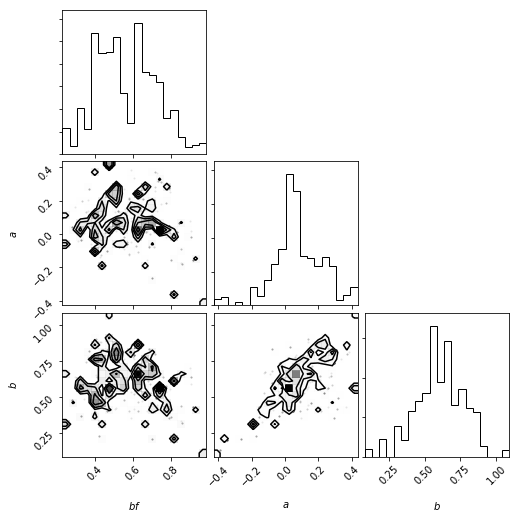

In [82]:
import corner
fig = corner.corner(samples, labels=["$bf$", "$a$", "$b$"],
                    )
fig.savefig("BF test4.png")

In [28]:
len(AllAvg_LMC)*nwalkers*25*15

7092000

In [41]:
rng_list = np.random.normal(0,1,100000)

In [42]:
%%timeit
for n in range(100000):
    np.random.normal(0, 1)

150 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
rand_from_list = np.random.randint(0,len(rng_list), 700)
rng_list[rand_from_list]           

array([-4.61690476e-01, -1.12423500e+00,  6.55643600e-03, -1.93271125e+00,
       -1.02644511e+00,  1.23899703e+00,  6.20838516e-01,  6.41428750e-01,
        9.77369536e-01, -2.82657087e-01,  7.23443099e-01, -3.95667125e-01,
        9.61446575e-01, -3.93612425e-01, -2.05473554e-01, -1.22804795e+00,
       -1.03485236e+00,  4.45758883e-01,  1.15616801e+00,  2.92169288e-01,
       -1.03041834e+00, -9.15724147e-01,  1.06303797e+00,  4.47134184e-01,
       -1.20673673e+00,  8.92348357e-02, -1.31210328e+00,  6.00914395e-01,
        3.02853350e-01,  3.29335827e-02,  2.63400131e+00,  6.87823764e-01,
       -8.01677246e-01,  1.33808390e+00,  6.71940012e-01, -1.21077967e+00,
        1.00239762e+00,  1.48468418e+00, -3.11986059e-01,  2.48616445e+00,
        1.00771087e+00, -1.40173241e+00, -9.87596732e-01, -1.17267341e+00,
        1.50011666e+00, -2.43885826e-01, -4.04431707e-01, -8.46288261e-01,
       -7.64033175e-01,  5.74329174e-01, -4.34594279e-01, -6.19637068e-01,
       -5.04803086e-01, -

In [47]:
rng_list[rand_from_list]

array([-4.61690476e-01, -1.12423500e+00,  6.55643600e-03, -1.93271125e+00,
       -1.02644511e+00,  1.23899703e+00,  6.20838516e-01,  6.41428750e-01,
        9.77369536e-01, -2.82657087e-01,  7.23443099e-01, -3.95667125e-01,
        9.61446575e-01, -3.93612425e-01, -2.05473554e-01, -1.22804795e+00,
       -1.03485236e+00,  4.45758883e-01,  1.15616801e+00,  2.92169288e-01,
       -1.03041834e+00, -9.15724147e-01,  1.06303797e+00,  4.47134184e-01,
       -1.20673673e+00,  8.92348357e-02, -1.31210328e+00,  6.00914395e-01,
        3.02853350e-01,  3.29335827e-02,  2.63400131e+00,  6.87823764e-01,
       -8.01677246e-01,  1.33808390e+00,  6.71940012e-01, -1.21077967e+00,
        1.00239762e+00,  1.48468418e+00, -3.11986059e-01,  2.48616445e+00,
        1.00771087e+00, -1.40173241e+00, -9.87596732e-01, -1.17267341e+00,
        1.50011666e+00, -2.43885826e-01, -4.04431707e-01, -8.46288261e-01,
       -7.64033175e-01,  5.74329174e-01, -4.34594279e-01, -6.19637068e-01,
       -5.04803086e-01, -